In [1]:
from Py2Rigs.rec import Rec
from Py2Rigs import sync,loader,plot
from Py2Rigs import plot
from matplotlib import pyplot as plt
import os
import shutil

In [2]:
%load_ext autoreload
%autoreload 2

c:\Users\micheli\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py:121: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [3]:
rec_folder = "Y:\\Pietro\\2Precordings\\"

datapath = rec_folder+"PM_251023_OBO038782\\post_inj\\suite2p\\plane0\\"

             
syncfile = rec_folder+"PM_251023_OBO038782\\post_inj\\rec_000_001.mat"
             
stimdict = rec_folder+"PM_251023_OBO038782\\post_inj\\stim_dict_251023_OBO038782_001.json"
trials_names = {0:"IPSI",1:"CONTRA",2:"BOTH"}

In [4]:
dataloader = loader.Dataloader()
dataloader.load_sync(syncfile,stimdict,trials_names)
dataloader.load_s2p_dir(datapath)


> Sync object generated

> loading data from Y:\Pietro\2Precordings\PM_251023_OBO038782\post_inj\suite2p\plane0\ ... Loaded data of size 1402x14600



In [23]:
rec = Rec(dataloader)
cells = rec.extract_cells()

> Using the parameters file found in current dir.
> parameters loaded.

> Analyzing trial responses ... 

  Extracting stim: contrast_ramp
    > Extracting trial: IPSI
    > Extracting trial: CONTRA
    > Extracting trial: BOTH

  Extracting stim: full_field
    > Extracting trial: IPSI
    > Extracting trial: CONTRA
    > Extracting trial: BOTH

> 243 responsive cells found (tot: 1402, keep_unresponsive: False, use_iscell: 0)


In [19]:
len(rec.responsive)

442

c:\Users\micheli\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


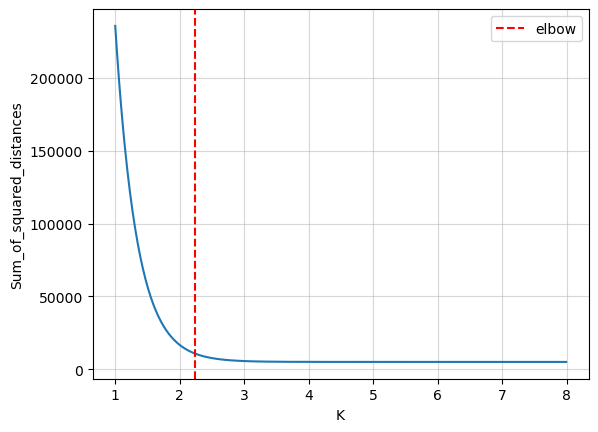

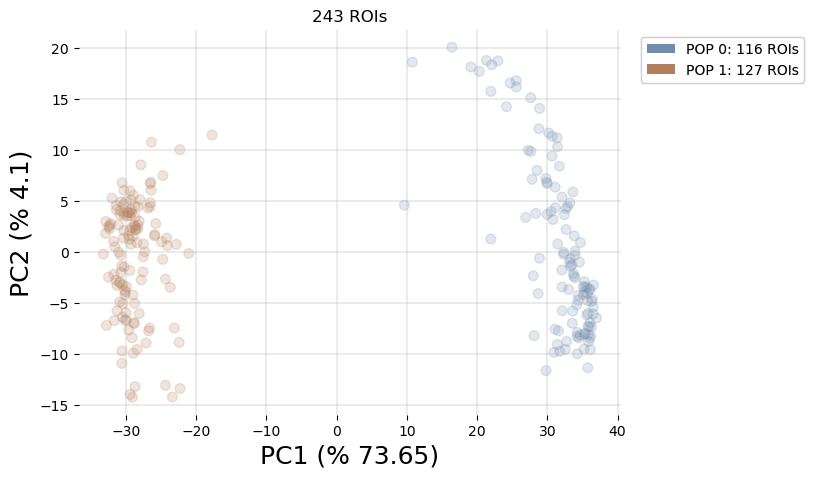

In [26]:
pops = rec.get_populations(list(rec.cells.keys()))

In [ ]:
### plot ###

import numpy as np

ordered_trials = list(trials_names.values())
stim_names = sorted(dataloader.sync.stims_names)

for id,pop in enumerate(pops):

    save_path = "POPULATION_#%d"%id

    if os.path.isdir(save_path):

        shutil.rmtree(save_path)

    os.mkdir(save_path)

    pop_cells = [cells[c] for c in pop]


    ### plot heatmap

    fig, axs = plt.subplots(len(trials_names),len(stim_names),figsize=(20,20))

    fig.suptitle('POPULATION #%d, N:%d'%(id,len(pop_cells)), fontsize=16)

    for i,trial in enumerate(ordered_trials):

        for j,stim in enumerate(stim_names):

            if not isinstance(axs, np.ndarray):

                ax = axs

            elif len(stim_names)==1:

                ax=axs[i]

            elif len(ordered_trials)==1:

                ax=axs[j]

            else:
                ax=axs[i,j]


            if trial in synchro.sync_ds[stim]:


                plot.plot_averages_heatmap(pop_cells, 
                                            synchro, 
                                            stims=stim, 
                                            trials=trial, 
                                            type='dff', 
                                            stim_bar=False,
                                            vmin=None, 
                                            vmax=None, 
                                            normalize='z', 
                                            cb_label="\u0394F/F (z-score)",
                                            ax=ax)

            else:

                ax.axis("off")

            if i == 0: ax.set_title(stim,fontsize=15)

    if len(ordered_trials)>1:

        for ax, trial in zip(axs, ordered_trials):

            ax[0].set_ylabel(trial,fontsize=18)
    else:

        ax.set_ylabel(trial,fontsize=18)

    plt.savefig(r"%s/heatmaps_dff.png"%save_path, bbox_inches="tight")
    plt.close(fig)

    ###
    #plot full heatmap
    fig, axs = plt.subplots(1,figsize=(10,7))
    fig.suptitle('POPULATION #%d, N:%d'%(id,len(pop_cells)), fontsize=16)

    plot.plot_averages_heatmap(pop_cells,
                                synchro,
                                full="dff",
                                vmin=None, 
                                vmax=None, 
                                normalize='z', 
                                cb_label="\u0394F/F (z-score)", 
                                stim_bar=False,
                                ax=axs)
    
    plt.savefig(r"%s/full_heatmap_dff.png"%save_path, bbox_inches="tight")
    plt.close(fig)

    ### plot averaged responses

    plot.plot_multipleStim(pop_cells, 
                           synchro, 
                           average=True, 
                           save=True, 
                           save_path=save_path, 
                           stims=None, 
                           trials=None, 
                           full='dff',
                           share_x=False, 
                           share_y=False,
                           group_trials=True, 
                           legend=True)


    # ### plot all the cells

    # save_path_allcells = save_path+r"/all_cells"

    # if os.path.isdir(save_path_allcells):

    #     shutil.rmtree(save_path_allcells)

    # os.mkdir(save_path_allcells)

    # plot.plot_multipleStim(pop_cells, 
    #                        synchro, 
    #                        average=False, 
    #                        save=True, 
    #                        save_path=save_path_allcells, 
    #                        stims=None, 
    #                        trials=None, 
    #                        full='dff',
    #                        share_x=False, 
    #                        share_y=False,
    #                        group_trials=False, 
    #                        legend=True)
    



In [ ]:
## plot FOV
plot.plot_FOV(pops, rec, k=5)